In [7]:
# NON-STATIONARY MODELS


In [8]:
# Una serie random walk, cuando se la diferencia obtenemos white noise que es un proceso estacionario:

    # xt = xt−1 + wt, the first-order differenced series is white noise {wt} (i.e., ∇xt = xt − xt−1 = wt)

# Una serie que es una tendencia lineal con un error white noise, cunado se la dervia (diferencia) obtenemos un proceso de medias móviles de orden 1,
# MA(1), que es un proceso estacionario:

# if xt = a + bt + wt, a linear trend with white noise errors, ∇xt = xt−xt−1 = b+wt−wt−1, which is a stationary moving average process

# Se plantea si la diferenciación realmente elimina la tendencia determinista.

# The arima function in R does not allow the fitted differenced models to include a constant. 
# If you wish to fit a differenced model to a deterministic trend using R you need to difference, then mean adjust the differenced series
# to have a mean of 0, and then fit an ARMA model to the adjusted differenced series using arima with include.mean set to FALSE and d = 0.


In [9]:
# Differencing and the electricity series

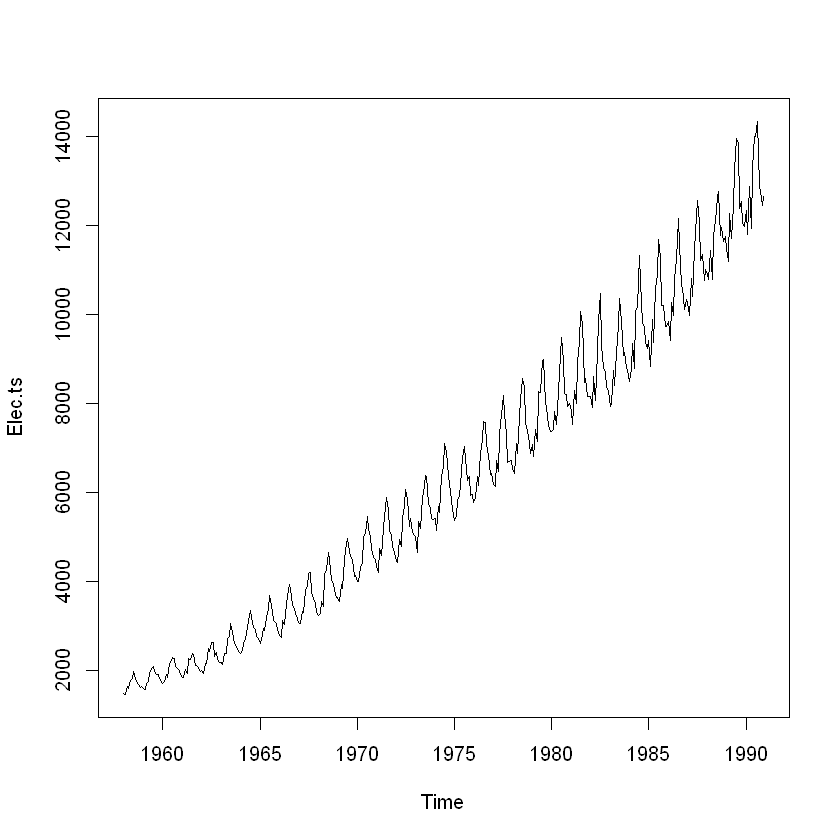

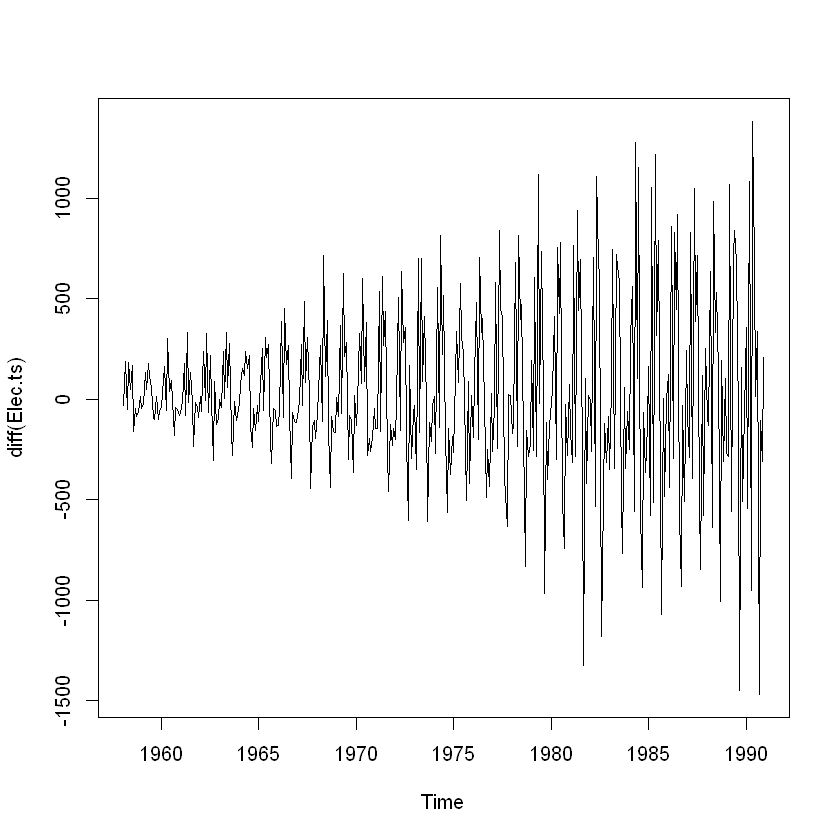

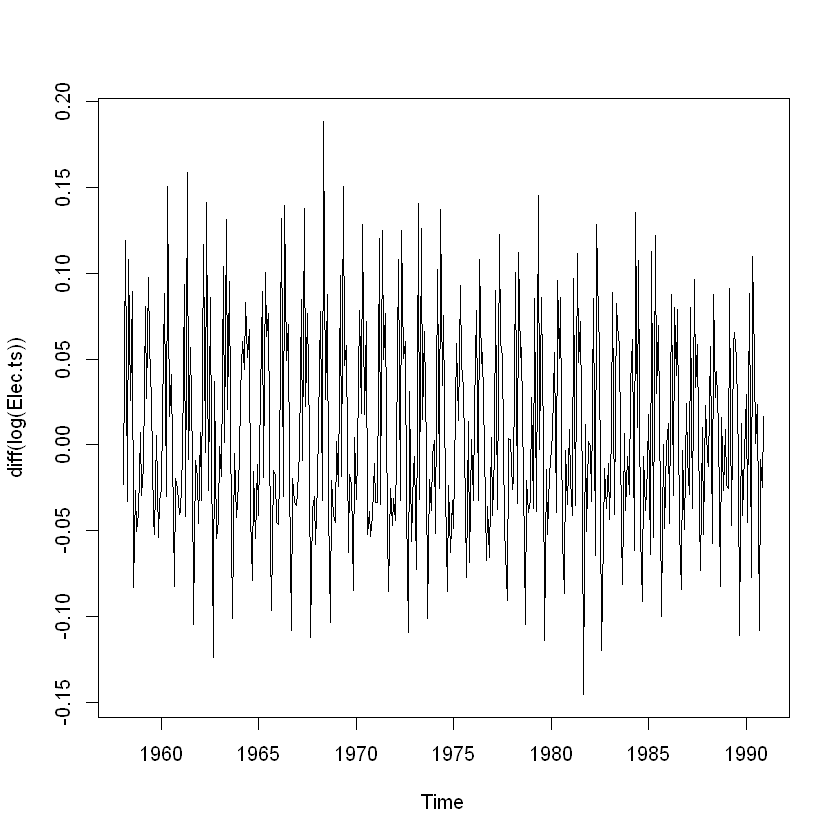

In [10]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/cbe.dat'

CBE <- read.table(www, he = T)
Elec.ts <- ts(CBE[, 3], start = 1958, freq = 12)

#layout(c(1, 1, 2, 3))# el primer gráfico ocupa la mitad del espacio
#par(mar = c(1, 1, 1, 1))# reduce los márgenes para que entren los 3 gráficos.

plot(Elec.ts)
plot(diff(Elec.ts))
plot(diff(log(Elec.ts)))

# The increasing trend is no longer apparent in the plots of the differenced series.

In [11]:
# diff(diff(x)) and diff(x, d=2) would both produce second-order differenced series of x. Second-order differencing may sometimes 
# successfully reduce a series with an underlying curve trend to white noise.

# A further parameter (lag) can be used to set the lag of the differencing. By default, lag is set to unity.

# For example, diff(x, lag=12) will remove both a linear trend and additive seasonal effects in a monthly series.

In [12]:
# Simulation and fitting


In [13]:
# data for the ARIMA(1, 1, 1) model xt = 0.5xt−1+xt−1−0.5xt−2+wt+0.3wt−1

set.seed(1)
x <- w <- rnorm(1000)

for (i in 3:1000) x[i] <- 0.5 * x[i - 1] + x[i - 1] -0.5*
  x[i - 2] + w[i] + 0.3 * w[i - 1]

arima(x, order = c(1, 1, 1))



Call:
arima(x = x, order = c(1, 1, 1))

Coefficients:
         ar1     ma1
      0.4235  0.3308
s.e.  0.0433  0.0450

sigma^2 estimated as 1.067:  log likelihood = -1450.13,  aic = 2906.26

In [14]:
# En lugar de construir simuladamente el modelo, puedo usar la función de simular:

x <- arima.sim(model = list(order = c(1, 1, 1), ar = 0.5,
                            ma = 0.3), n = 1000)
arima(x, order = c(1, 1, 1))



Call:
arima(x = x, order = c(1, 1, 1))

Coefficients:
         ar1     ma1
      0.5567  0.2502
s.e.  0.0372  0.0437

sigma^2 estimated as 1.079:  log likelihood = -1457.45,  aic = 2920.91

In [15]:
# IMA(1, 1) model fitted to the beer production series:

# The Australian beer production series is in the second column of the dataframe CBE. 

# The beer data is dominated by a trend of increasing beer production over the period, so a simple integrated model IMA(1, 1) is fitted to
# allow for this trend and a carryover of production from the previous month.

# The IMA(1, 1) model is often appropriate because it represents a linear trend with white noise added. 
# The residuals are analysed using the correlogram, which has peaks at yearly cycles and suggests that a seasonal term is required.



Call:
arima(x = Beer.ts, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.3334
s.e.   0.0558

sigma^2 estimated as 360.4:  log likelihood = -1723.27,  aic = 3450.53

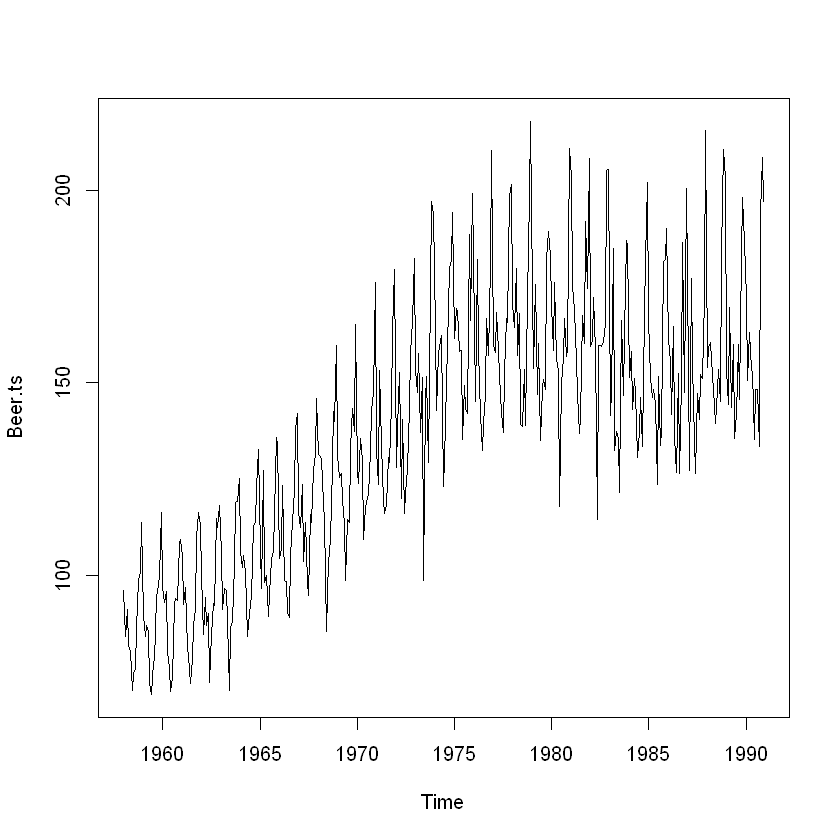

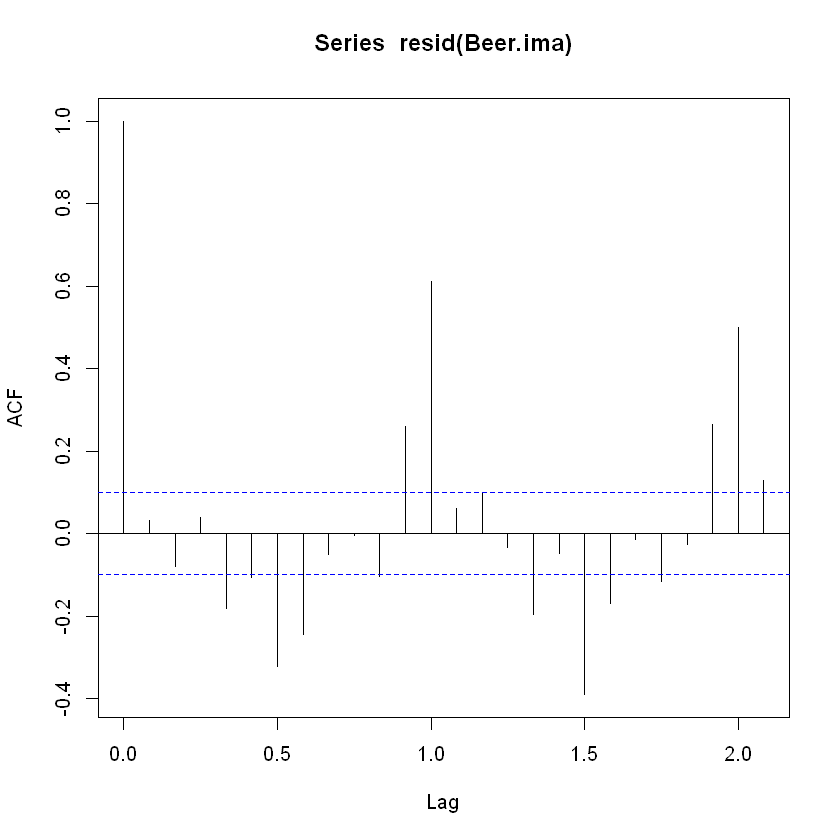

In [16]:
#layout(c(1, 2))
#par(mar = c(2, 2, 1, 2))

Beer.ts <- ts(CBE[, 2], start = 1958, freq = 12)
#Beer.ts
plot(Beer.ts)

Beer.ima <- arima(Beer.ts, order = c(0, 1, 1))
Beer.ima

acf(resid(Beer.ima))

# From the output above the fitted model is xt = xt−1+wt−0.33wt−1

In [17]:
# Forecasts can also be obtained using the predict function in R with the parameter n.ahead set to the number of values in the future.

# For example, the production for the next year in the record is obtained using predict and the total annual production for 1991
# obtained by summation:

Beer.1991 <- predict(Beer.ima, n.ahead = 12)
#Beer.1991$pred
sum(Beer.1991$pred)


[1] 2365.412

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1991,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177
1992,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177
1993,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177,197.1177


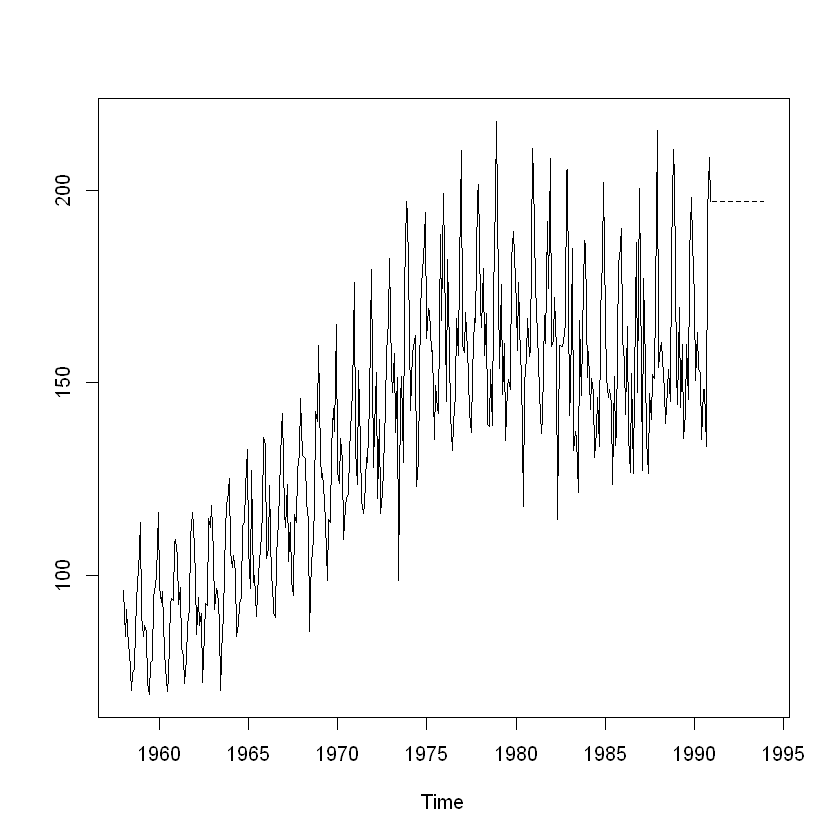

In [18]:
#####################################

# Esto es un intento por graficar prediccion pero no lo consigo, no se si es porque falta algo o porque no tiene la estacionalidad,
# me da como un valor constante.

Beer.1991 <- predict(Beer.ima, n.ahead = 36)
ts.plot(cbind(Beer.ts, Beer.1991$pred), lty = 1:2)

Beer.1991$pred

# Es así, da siempre el mismo valor, debe ser eso nomás, que falta la variación estcional, esto está mencionado arriba como que este 
# no sería el mejor modelo.

# Esto está escrito unos párrafos arriba: 'The residuals are analysed using the correlogram, which has peaks at yearly cycles and suggests
# that a seasonal term is required.

#################################


In [19]:
# SEASONAL ARIMA MODELS

In [20]:
#  A simple AR model with a seasonal period of 12 units, denoted as ARIMA(0, 0, 0)(1, 0, 0)12, is xt = αxt−12 + wt. Such a model would
# be appropriate for monthly data when only the value in the month of the previous year influences the current monthly value. 
# It is common to find series with stochastic trends that nevertheless have seasonal influences. 
# The model in (a) above could be extended to xt = xt−1 + αxt−12 − αxt−13 + wt. ARIMA(0, 1, 0)(1, 0, 0)12. 
# Note that this model could also be written ∇xt = α∇xt−12 + wt, which emphasises that the change at time t depends on the change 
# at the same time (i.e., month) of the previous year. The model is non-stationary.

# A simple quarterly seasonal moving average model is xt = (1 − βB4)wt = wt −βwt−4. This is stationary and only suitable for data without a trend.
# If the data also contain a stochastic trend, the model could be extended to include first-order differences, xt = xt−1 + wt − βwt−4, 
# which is an ARIMA(0, 1, 0)(0, 0, 1)4 process.

#  Alternatively, if the seasonal terms contain a stochastic trend, differencing can be applied at the seasonal period
# to give xt = xt−4 + wt − βwt−4, which is ARIMA(0, 0, 0)(0, 1, 1)4.


In [21]:
# Choosing a best-fitting model using an appropriate criterion such as the AIC. Once a best-fitting model has been found, 
# the correlogram of the residuals should be verified as white noise. Some confidence in the best-fitting model can be gained
# by deliberately overfitting the model by including further parameters and observing an increase in the AIC.


In [22]:
# The model can be fitted with the arima function, which requires an additional parameter seasonal to specify the seasonal components. 

# In the example below, we fit two models with first-order terms to the logarithm of the electricity production series.
# The first uses autoregressive terms and the second uses moving average terms.

# The parameter d = 1 is retained in both the models since we found that first-order differencing successfully removed the trend in the series.


In [24]:
# The seasonal ARI model provides the better fit since it has the smallest AIC.

AIC (arima(log(Elec.ts), order = c(1,1,0), seas = list(order = c(1,0,0), 12)))

AIC (arima(log(Elec.ts), order = c(0,1,1), seas = list(order = c(0,0,1), 12)))


[1] -1764.741

[1] -1361.586

In [25]:
# Para iterar por diferentes modelos y elegir los que mejor ajustan:

# we could write a simple function that fits a range of ARIMA models and selects the best-fitting model.
# This approach works better when the conditional sum of squares method CSS is selected in the arima function, as the algorithm is more robust.
# To avoid over parametrisation, the consistent Akaike Information Criteria can be used in model selection

get.best.arima <- function(x.ts, maxord = c(1,1,1,1,1,1))
{
  best.aic <- 1e8
  n <- length(x.ts)
  for (p in 0:maxord[1]) for(d in 0:maxord[2]) for(q in 0:maxord[3])
    for (P in 0:maxord[4]) for(D in 0:maxord[5]) for(Q in 0:maxord[6])
    {
      fit <- arima(x.ts, order = c(p,d,q),
                   seas = list(order = c(P,D,Q),
                               frequency(x.ts)), method = "CSS")
      fit.aic <- -2 * fit$loglik + (log(n) + 1) * length(fit$coef)
      if (fit.aic < best.aic)
      {
        best.aic <- fit.aic
        best.fit <- fit
        best.model <- c(p,d,q,P,D,Q)
      }
    }
  list(best.aic, best.fit, best.model)
}


Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"


[1] 0 1 1 2 0 2

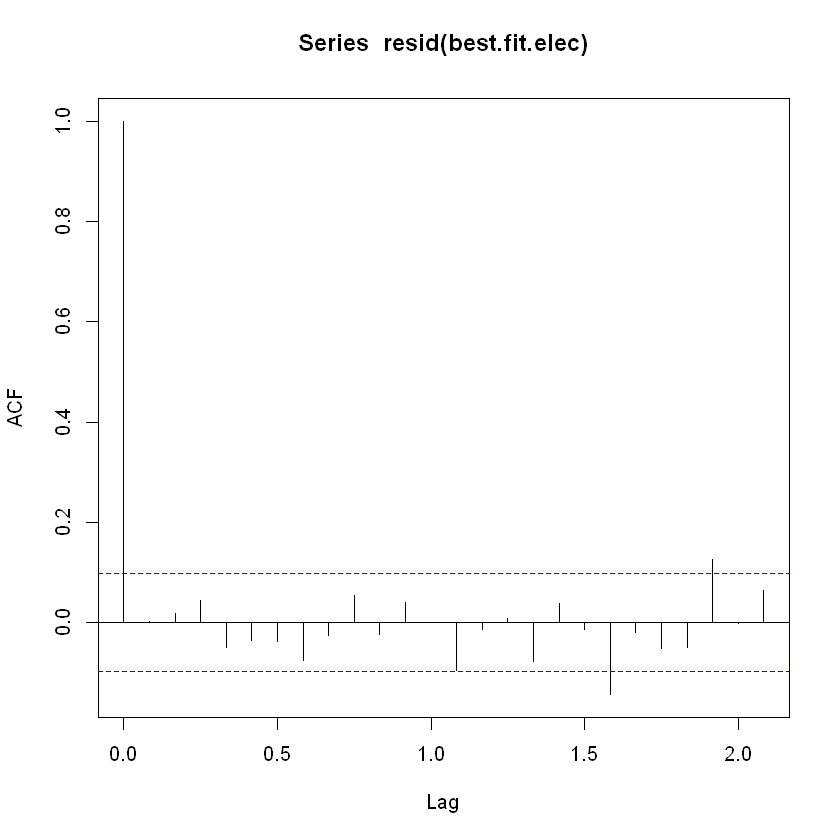

In [26]:
best.arima.elec <- get.best.arima( log(Elec.ts), maxord = c(2,2,2,2,2,2))
best.fit.elec <- best.arima.elec[[2]]
acf( resid(best.fit.elec) )
best.arima.elec [[3]]


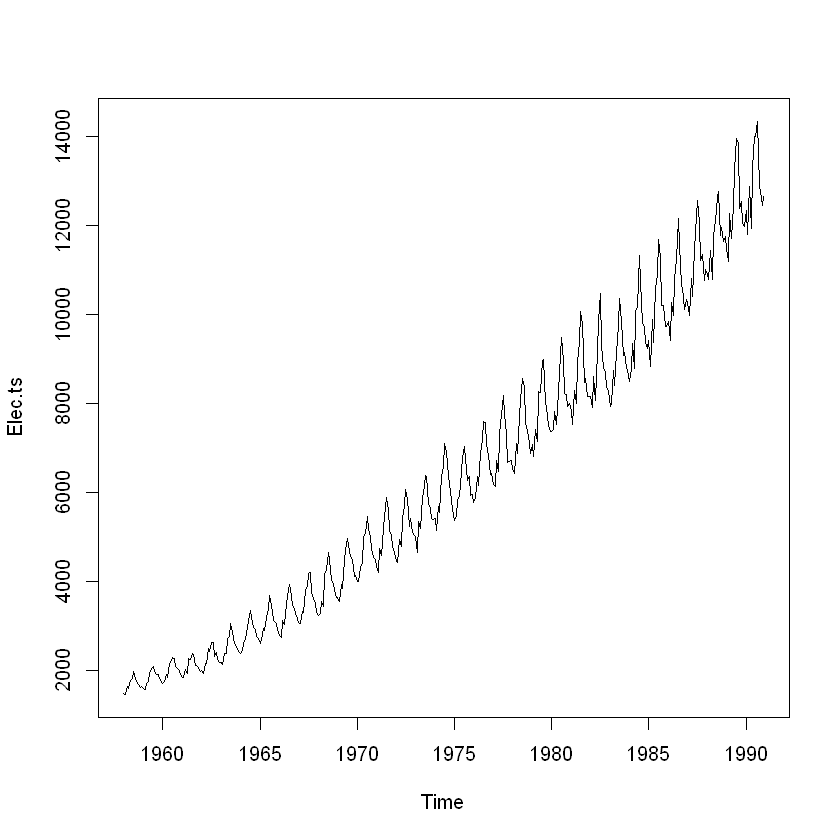

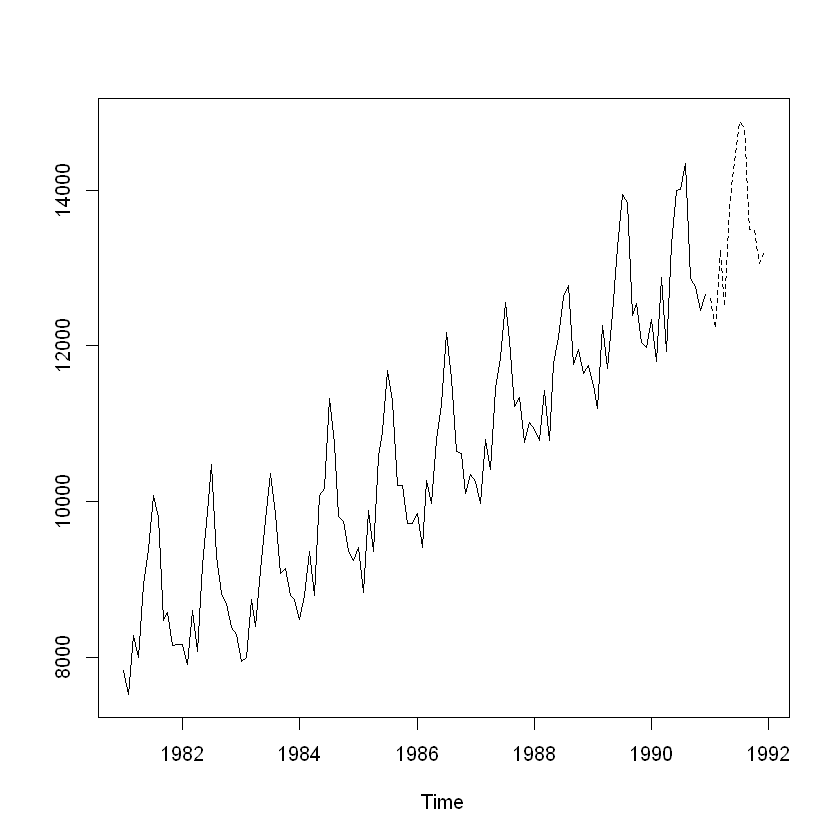

In [27]:
plot(Elec.ts)
#plot(log(Elec.ts))
ts.plot( cbind( window(Elec.ts,start = 1981),
                exp(predict(best.fit.elec,12)$pred) ), lty = 1:2)


In [28]:
# From the code above, we see the best-fitting model using terms up to second order is ARIMA(0, 1, 1)(2, 0, 2)12

# Although higher-order terms could be tried by increasing the values in maxord, this would seem unnecessary 
# since the residuals are approximately white noise

# For the predicted values, a biased correction factor could be used, although this would seem unnecessary given that the residual standard 
# deviation is small compared with the predictions.


In [29]:
best.fit.elec
summary(resid(best.fit.elec))

sd(resid(best.fit.elec))
sd(predict(best.fit.elec,12)$pred)



Call:
arima(x = x.ts, order = c(p, d, q), seasonal = list(order = c(P, D, Q), frequency(x.ts)), 
    method = "CSS")

Coefficients:
          ma1    sar1    sar2     sma1     sma2
      -0.6566  0.7315  0.2557  -0.3324  -0.3051
s.e.   0.0420  0.1270  0.1259   0.1279   0.0958

sigma^2 estimated as 0.0004161:  part log likelihood = 976.97

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0867436 -0.0108100  0.0000000 -0.0001606  0.0120229  0.0556729 

[1] 0.01976889

[1] 0.06371847

In [30]:
# ARCH models

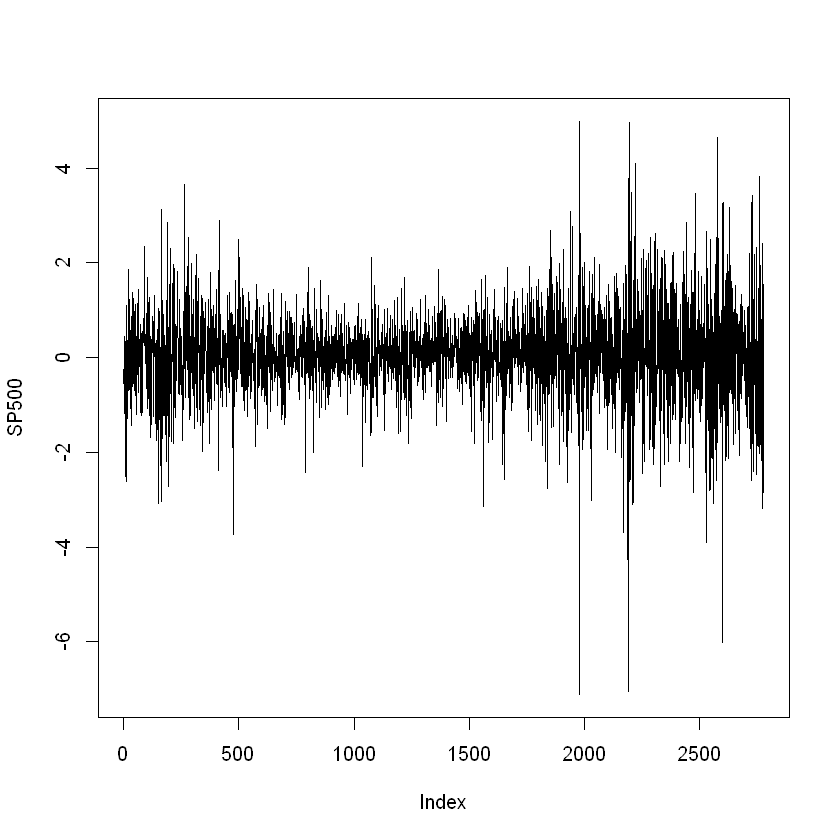

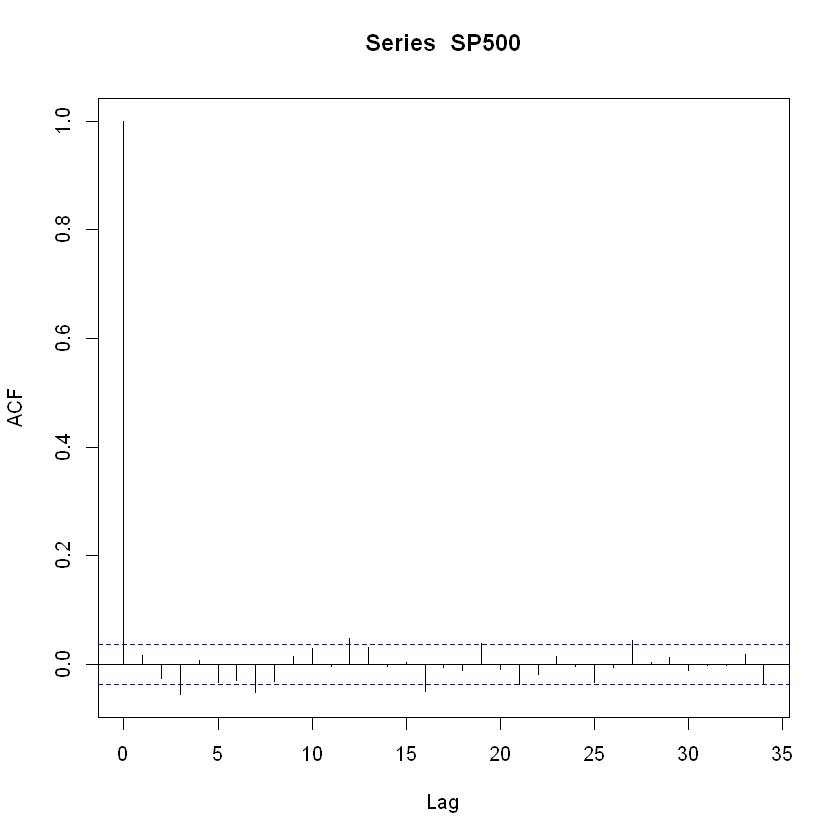

In [32]:
# S&P500 series: índices financieros y credit ratings

#layout(c(1, 2))
#par(mar = c(5, 4, 1, 2))

library(MASS)
data(SP500)
plot(SP500, type = 'l')
acf(SP500)


In [33]:
# The series exhibits periods of increased variability, sometimes called volatility in the financial literature, 
# although it does not increase in a regular way.

# When a variance is not constant in time but changes in a regular way,  as in the airline and electricity data
# (where the variance increased with the trend), the series is called heteroskedastic. 

# If a series exhibits periods of increased variance, so the variance is correlated in time (as observed in the S&P500 data),
# the series exhibits volatility and is called conditional heteroskedastic.
# Note that the correlogram of a volatile series does not differ significantly from white noise (Fig. 7.4b), but the series is 
# non-stationary since the variance is different at different times. 

# If a correlogram appears to be white noise (e.g., Fig. 7.4b), then volatility can be detected by looking at the correlogram of 
# the squared values since the squared values are equivalent to the variance.


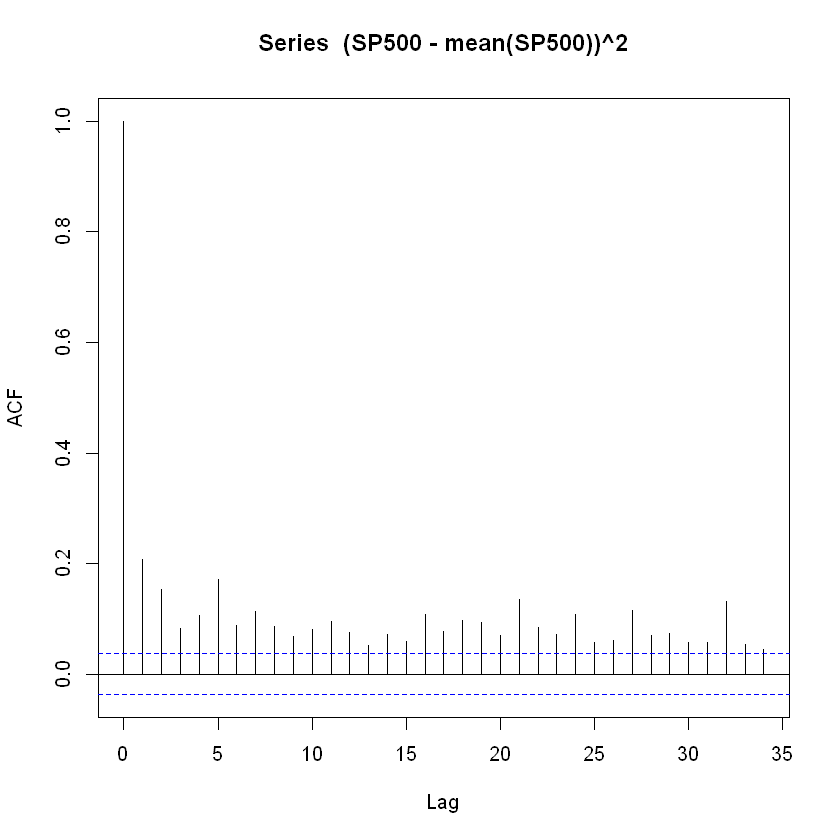

In [34]:
# The correlogram of the squared mean-adjusted values of the S&P500 index is given by:

acf((SP500 - mean(SP500))^2)

# From this we can see that there is evidence of serial correlation in the squared values, so there is evidence 
# of conditional heteroskedastic behaviour and volatility


In [35]:
# Modelling volatility: Definition of the ARCH model:


# The variance of an ARCH(1) process behaves just like an AR(1) model. 
# Hence, in model fitting, a decay in the autocorrelations of the squared residuals should indicate whether an ARCH model is appropriate or not. 

# The model should only be applied to a prewhitened residual series {Et} that is uncorrelated and contains no trends or seasonal changes, 
# such as might be obtained after fitting a satisfactory SARIMA model.


In [36]:
# Extensions and GARCH models.

# The generalised ARCH model, denoted GARCH(q, p), which has the ARCH(p) model as 
# the special case GARCH(0, p).

#  In R, a GARCH model can be fitted using the garch function in the tseries library


In [37]:
#  Simulation and fitted GARCH model:

# Code data are simulated for the GARCH(1, 1) model at = wt√ht,
# where ht = α0 +α1at−1 +β1ht−1 with α1 +β1 < 1 to ensure stability:

set.seed(1)
alpha0 <- 0.1
alpha1 <- 0.4
beta1 <- 0.2
w <- rnorm(10000)
a <- rep(0, 10000)
h <- rep(0, 10000)
for (i in 2:10000) {
  h[i] <- alpha0 + alpha1 * (a[i - 1]^2) + beta1 * h[i - 1]
  a[i] <- w[i] * sqrt(h[i])
}


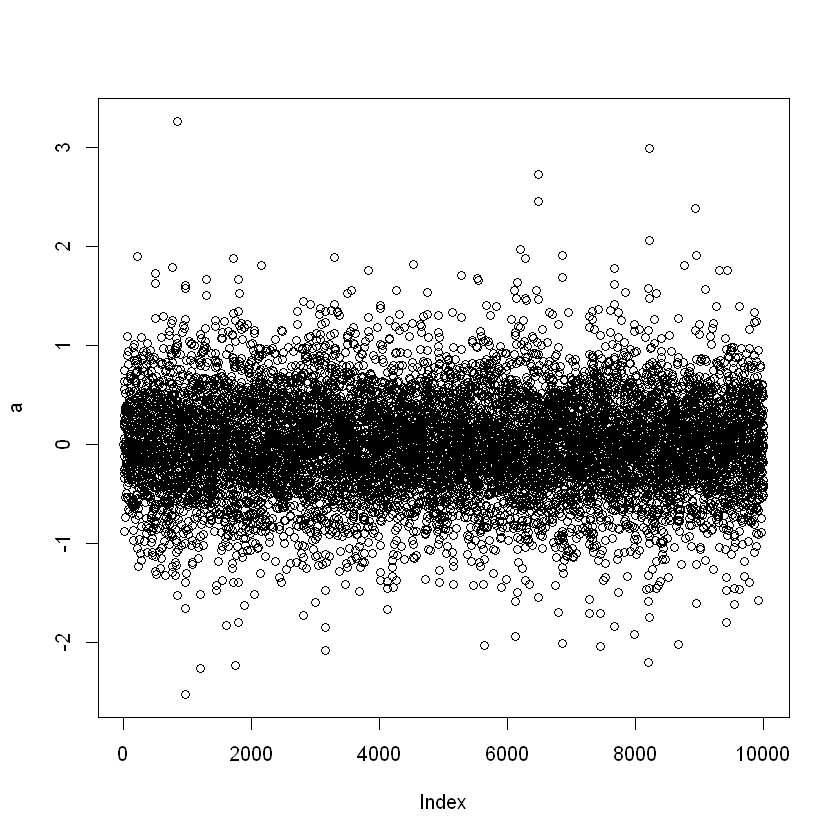

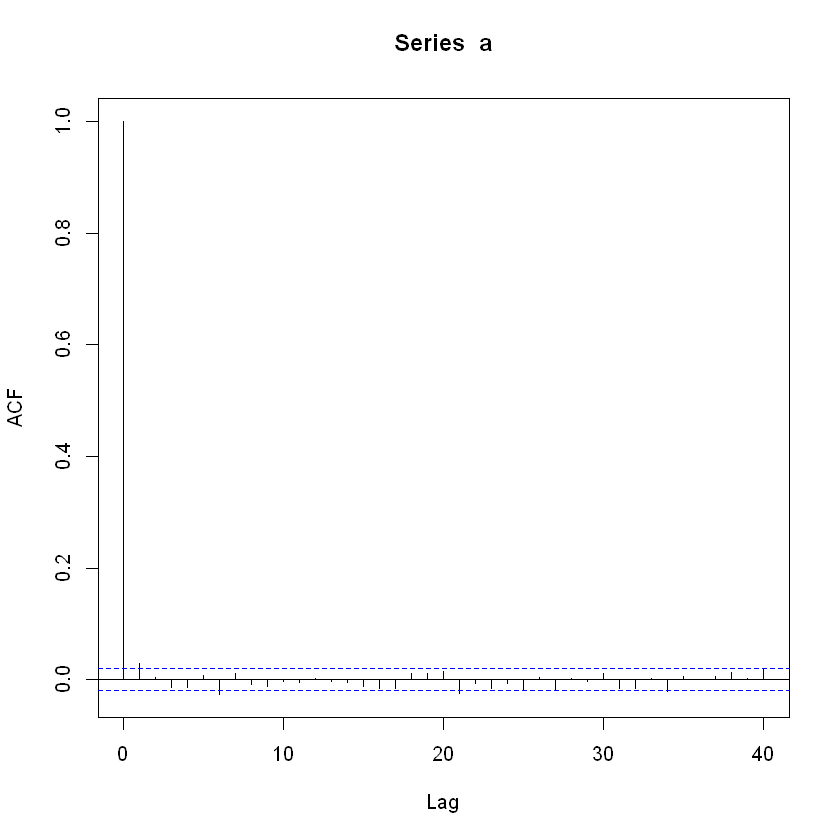

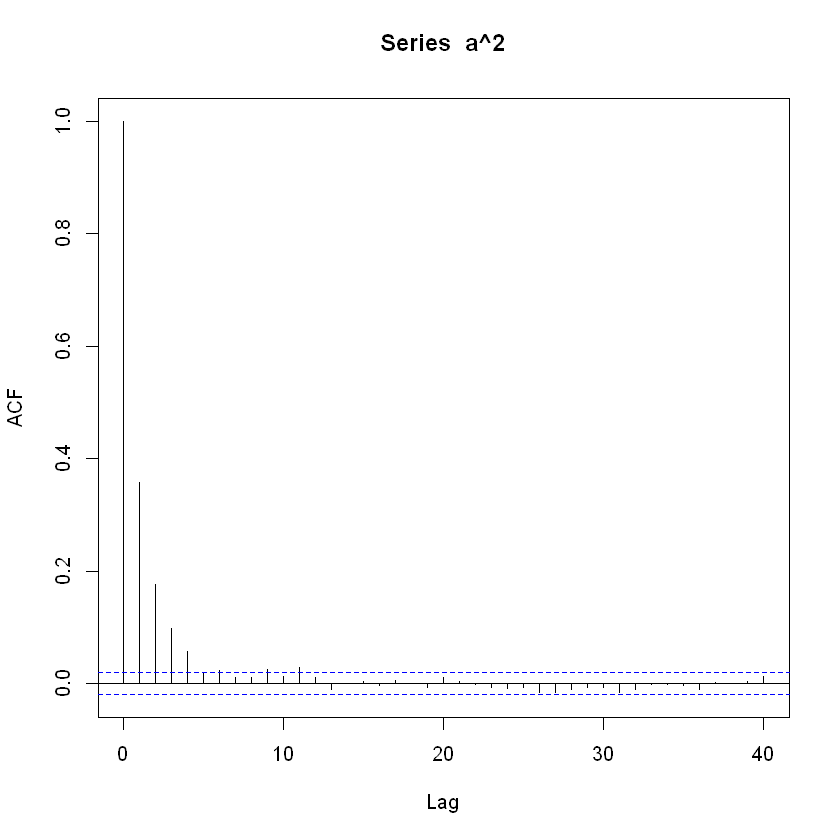

In [38]:
#layout(c(1, 1))
plot(a)

#layout(c(1, 2))

acf(a)
acf(a^2)


In [39]:
# The series in a exhibits the GARCH characteristics of uncorrelated values but correlated squared values

# In the following example, a GARCH model is fitted to the simulated series using the garch function, which can be seen to recover 
# the original parameters since these fall within the 95% confidence intervals. The default is GARCH(1,1),
# which often provides an adequate model, but higher-order models can be specified with the parameter order=c(p,q) for some choice of p and q.


In [40]:
library(tseries)
a.garch <- garch(a, grad = "numerical", trace = FALSE)
confint(a.garch)

# In the example above, we have used the parameter trace=F to suppress output and a numerical estimate of gradient grad="numerical" that is slightly 
# more robust (in the sense of algorithmic convergence) than the default.


Warning message:
"package 'tseries' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,2.5 %,97.5 %
a0,0.0882393,0.1092903
a1,0.3307897,0.4023932
b1,0.1928344,0.2954660


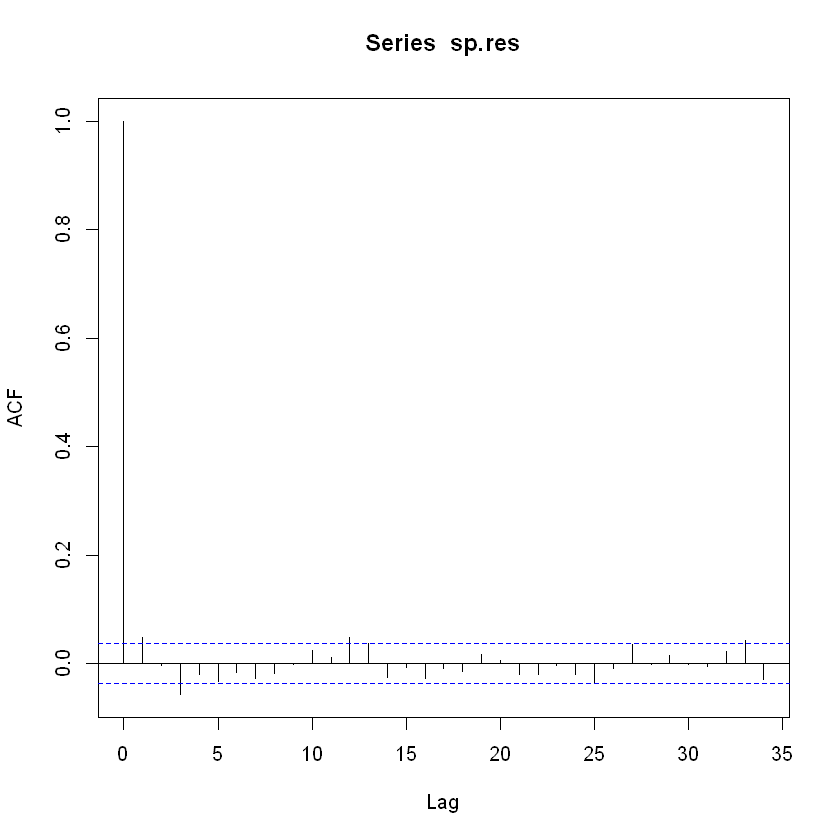

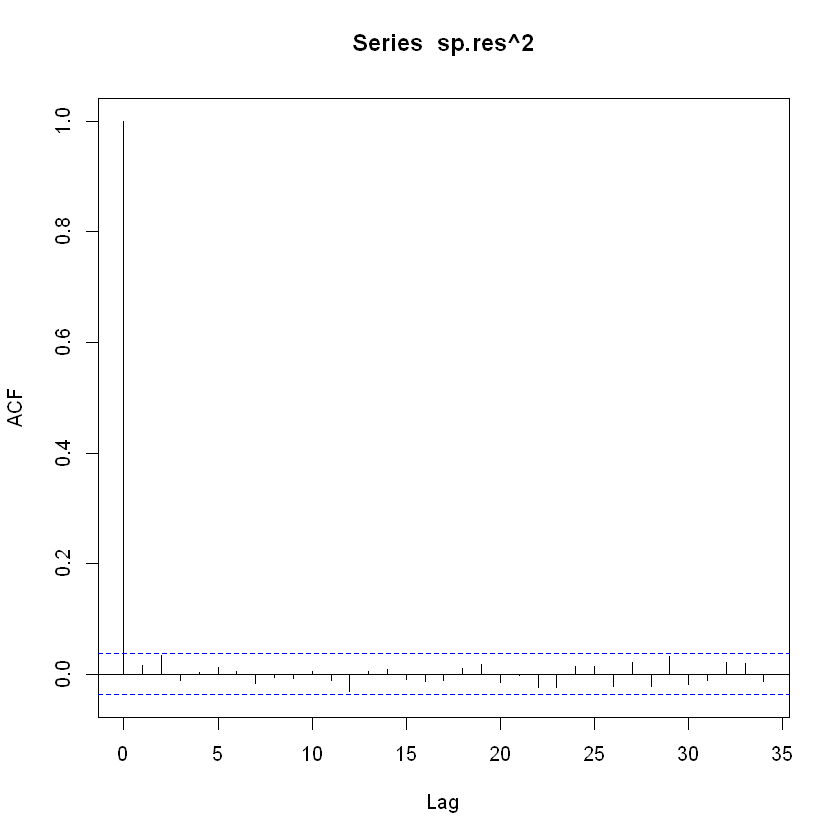

In [41]:
# Fit to S&P500 series

# If the GARCH model is suitable the residual series should appear to be a realisation of white noise with zero mean and unit variance

# The calculations are performed by the function garch.
# The first value in the residual series is not available (NA), so we remove the first value using [-1] and the correlograms are 
# then found for the resultant residual and squared residual series:

sp.garch <- garch(SP500, trace = F)
sp.res <- sp.garch$res[-1]
acf(sp.res)
acf(sp.res^2)

# Both correlograms suggest that the residuals of the fitted GARCH model behave like white noise, indicating a satisfactory fit has been obtained.


Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"
Warning message in arima(x.ts, order = c(p, d, q), seas = list(order = c(P, D, Q), :
"possible convergence problem: optim gave code = 1"


[1] 1 1 2 2 0 1

,ar1,ma1,ma2,sar1,sar2,sma1
2.5 %,0.8317386,-1.447401,0.3256697,0.8576773,-0.02501929,-0.9690566
97.5 %,0.9127950,-1.312552,0.4530477,1.0041425,0.07413469,-0.8507002


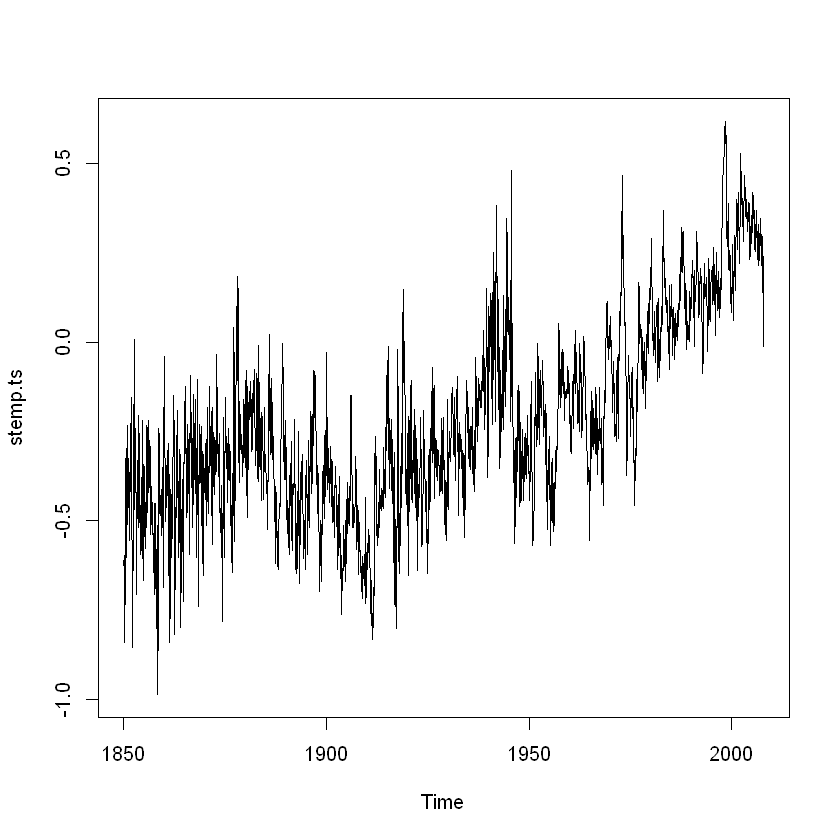

In [42]:
stemp <- scan('https://raw.githubusercontent.com/dallascard/Introductory_Time_Series_with_R_datasets/master/stemp.dat')
stemp.ts <- ts(stemp, start = 1850, freq = 12)
#layout(c(1, 1))
plot(stemp.ts)

stemp.best <- get.best.arima(stemp.ts, maxord = rep(2,6))
stemp.best[[3]]# El resultado de esto es: 112201

stemp.arima <- arima(stemp.ts, order = c(1,1,2),
                     seas = list(order = c(2,0,1), 12))

t(confint(stemp.arima))# the transpose t() was taken to provide these in rows instead of columns


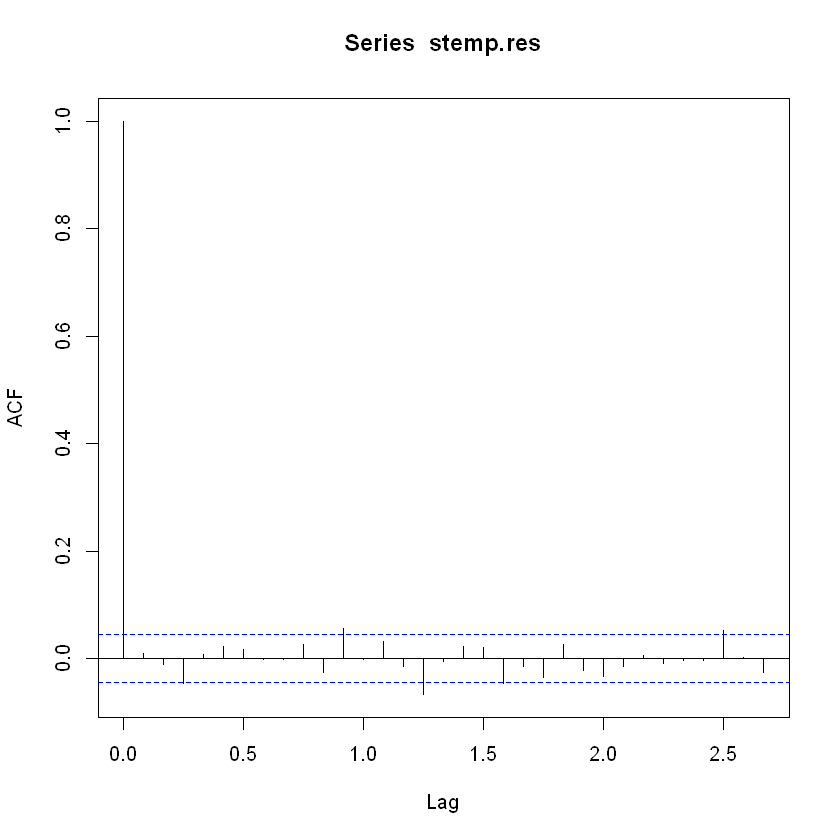

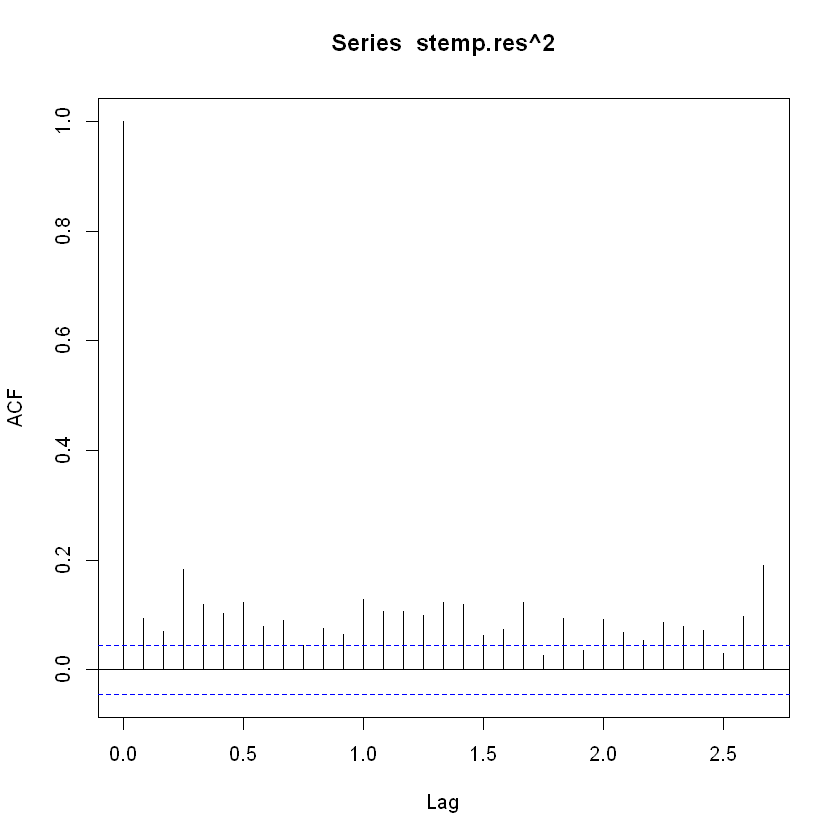

In [44]:
# To check for goodness-of-fit, the correlogram of residuals from the ARIMA model is plotted (Fig. 7.9a).
# In addition, to investigate volatility, the correlogram of the squared residuals is found.

stemp.res <- resid(stemp.arima)
#layout(1:2)
acf(stemp.res)
acf(stemp.res^2)


,a0,a1,b1
2.5 %,9.710626e-06,0.03264244,0.9257899
97.5 %,1.462336e-04,0.06455859,0.9635381


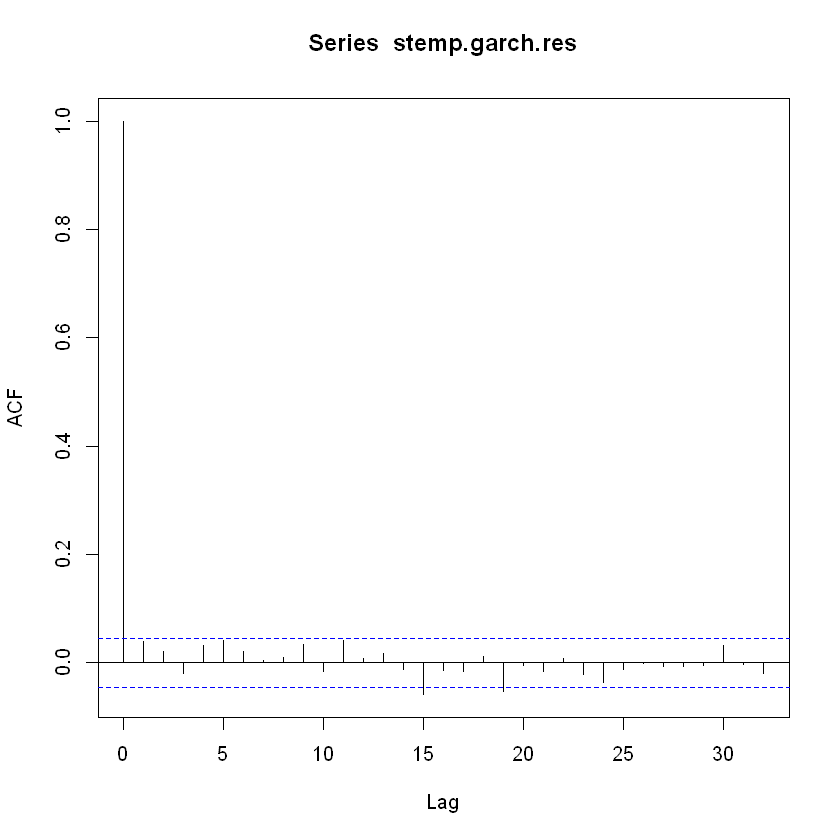

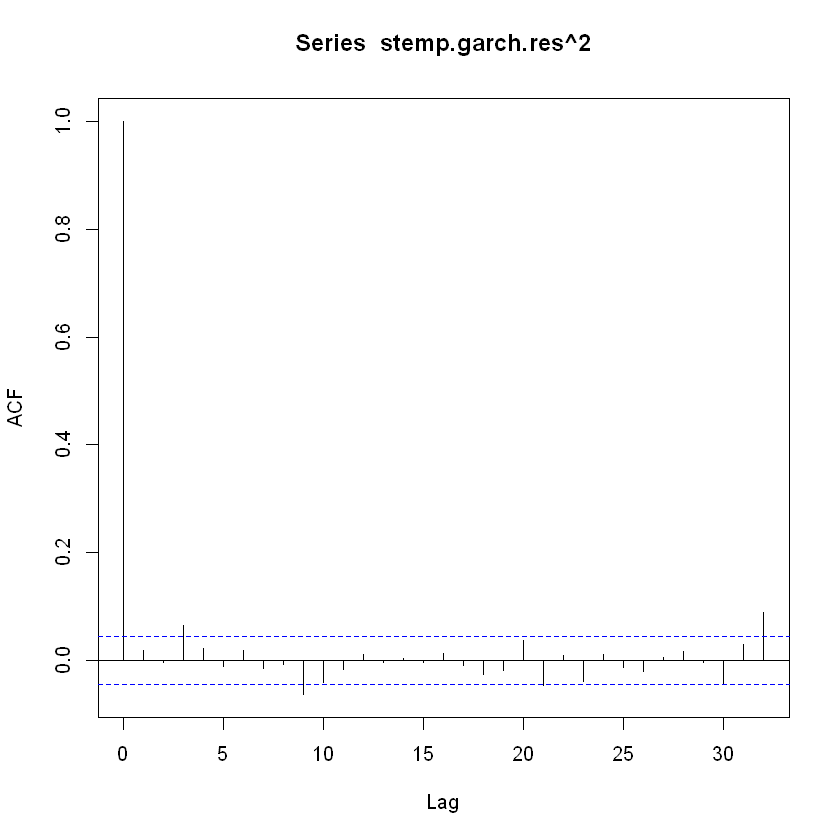

In [45]:
# There is clear evidence of volatility since the squared residuals are correlated at most lags (Fig. 7.9b).
# Hence, a GARCH model is fitted to the residual series:

stemp.garch <- garch(stemp.res, trace = F)
t(confint(stemp.garch))

stemp.garch.res <- resid(stemp.garch)[-1]
acf(stemp.garch.res)
acf(stemp.garch.res^2)
